# 输出层的设计
一般来说
* 回归问题使用恒等函数
* 分类问题使用 softmax 函数

机器学习的问题大致可以分为两类：回归问题和分类问题。
* 分类问题是指将输入数据划分到不同类别中去的问题，比如垃圾邮件分类、图像识别等。
* 回归问题是指预测一个连续值的问题，比如房价预测、股票价格预测等。

使用的函数说明
1. np.max(a) 返回数组 a 中的最大值
2. np.exp(a) 对数组 a 中的每个元素计算指数函数
3. np.sum(a) 对数组 a 中的所有元素求和

softmax 函数为什么要减去最大值？
* 减去最大值是为了防止溢出（overflow）。
* 当输入数组 a 中的某个元素非常大时，计算 exp(a) 会导致数值溢出，进而影响计算结果。
* 通过减去最大值，可以将输入数组的范围缩小，避免溢出问题，同时不影响 softmax 函数的输出结果。

为什么减去最大值不影响结果？
* exp(a) = exp(a - c) * exp(c)
* 设输入数组为 a，最大值为 c，则 softmax 函数的计算过程如下：
  softmax(a) = exp(a) / sum(exp(a))
  = exp(a - c) * exp(c) / sum(exp(a - c) * exp(c))
  = exp(a - c) / sum(exp(a - c))
* 可以看出，减去最大值 c 后，softmax 函数的输出结果并没有改变。

[0.01568275 0.12806802 0.85624923]


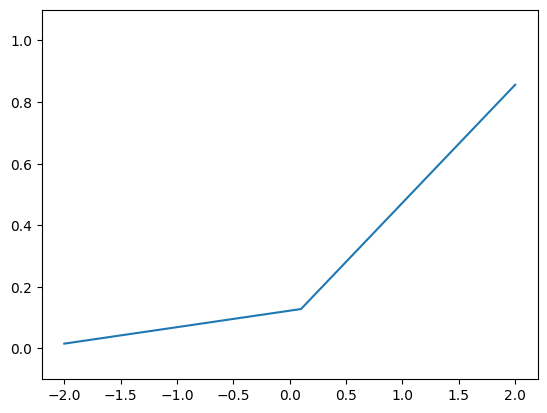

1.0


In [8]:
# softmax 函数
import numpy as np
import matplotlib.pyplot as plt

def softmax(a):
    c = np.max(a) # 为了防止溢出，减去最大值
    exp_a = np.exp(a - c) # 计算 exp(a - c)
    sum_exp_a = np.sum(exp_a) # 计算 exp(a - c) 的和
    y = exp_a / sum_exp_a # 计算 softmax 的值
    return y

# 对 softmax 函数进行画图
a = np.array([-2.0, 0.1, 2.0])
b = softmax(a) # 调用 softmax 函数，得到 b
print(b)
plt.plot(a, b) # 画图
plt.ylim(-0.1, 1.1) # y 轴的范围
plt.show() # 显示图像
print(np.sum(b))

## softmax 函数的特点
* softmax 函数的输出值在 0 到 1 之间
* softmax 函数的输出值的和为 1
* softmax 函数可以将输入值转换为概率分布

上面的代码中 a[0] 的概率为 0.015, a[1] 的概率为 0.128, a[2] 的概率为 0.85。因为第三个概率最高，所以答案是 a[2]。
* 或者严谨的回答，85% 的概率是 a[2]，12.8% 的概率是 a[1]，1.5% 的概率是 a[0]。
* 也就是说，softmax 函数的输出值可以看作是各个类别的概率。
* 所以机器学习中常用 softmax 函数作为分类问题的输出层激活函数。

```
由于指数函数是单调递增的，所以输入值最大的元素对应的输出值也是最大的。
也就是说，softmax 函数不会改变输入值的大小关系。因此在进行分类时，输出层的softmax 函数可以省略。
实际问题中，指数函数需要一定的计算量，所以 softmax 函数一般会被省略掉。
```
### 输出层的神经元数量
* 输出层的神经元数量等于分类的类别数量
* 比如，识别数字 0~9 的图片，输出层的神经元数量为 10
* 输出层的每个神经元对应一个类别，输出值表示该类别的概率
* 选择输出值最大的神经元对应的类别作为最终的分类结果